In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
λ = 2

stats.poisson(λ)

Text(0.5, 1.0, 'Poisson Distribution with $\\lambda$ = 2')

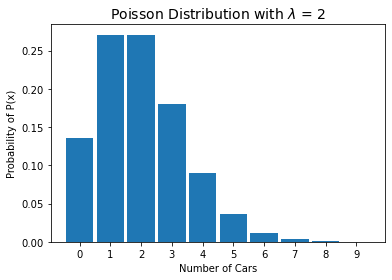

In [176]:
x = np.arange(0, 10)
y = stats.poisson(λ).pmf(x)

plt.bar(x, y, width = 0.9)
plt.xlabel('Number of Cars')
plt.ylabel('Probability of P(x)')
plt.xticks(np.arange(0, 10, 1))
plt.title('Poisson Distribution with $\lambda$ = 2', fontsize = 14)

## 1a. What is the probability that no cars drive up in the noon hour?

In [3]:
stats.poisson(λ).pmf(0)

0.1353352832366127

## 1b. What is the probability that 3 or more cars come through the drive through?

In [4]:
stats.poisson(λ).sf(2)

0.32332358381693654

## 1c. How likely is it that the drive through gets at least 1 car?

In [5]:
stats.poisson(λ).sf(0)

0.8646647167633873

# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [6]:
stats.norm(3.0, 0.3)

## 2a. What grade point average is required to be in the top 5% of the graduating class?

In [7]:
stats.norm(3.0, 0.3).isf(0.05)

3.4934560880854417

## 2b. What GPA constitutes the bottom 15% of the class?

In [130]:
stats.norm(3.0, 0.3).isf(0.84)


2.7016626350370743

In [131]:
bottom_gpa = stats.norm(3.0, 0.3).ppf(0.15)
bottom_gpa

2.689069983151863

In [132]:
print(f'{bottom_gpa.round(2)} or lower constitutes the bottom 15% of the class')

2.69 or lower constitutes the bottom 15% of the class


In [133]:
np.quantile(np.random.normal(3, 0.3, 10_000), 0.15)

2.6873198327888206

## 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
- Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

- 1st decile: 0-10%
- 2nd decile: 10-20%
- 3rd decile: 20-30%

In [31]:
upper_sch = stats.norm(3.0, 0.3).isf(0.7)
upper_sch.round(2)

2.84

In [32]:
lower_sch = stats.norm(3.0, 0.3).isf(0.8)
lower_sch.round(2)

2.75

In [33]:
print(f'Yes, a student with a 2.8 GPA would qualify for the scholarship as the GPA range is {lower_sch.round(2)} - {upper_sch.round(2)}.')

Yes, a student with a 2.8 GPA would qualify for the scholarship as the GPA range is 2.75 - 2.84.


In [134]:
stats.norm(3, 0.3).ppf([0.2, 0.3])

array([2.74751363, 2.84267985])

In [173]:
#using simulation
np.quantile(np.random.normal(3, 0.3, 10_000), [0.2, 0.3])

array([2.74650508, 2.84078269])

## 2d. If I have a GPA of 3.5, what percentile am I in?

In [135]:
gpa_35 = stats.norm(3.0, 0.3).cdf(3.5)
gpa_35.round(2)

0.95

In [139]:
print(f'You are in the {(gpa_35.round(2))*100}th percentile.')

You are in the 95.0th percentile.


In [174]:
#using simulation
np.random.normal(3, 0.3, 10_000)

array([3.29639574, 2.43800258, 3.32029891, ..., 3.11747572, 2.61342032,
       3.27248799])

In [175]:
(np.random.normal(3, 0.3, 10_000) < 3.5).mean()* 100

94.95

# 3. A marketing website has an average click-through rate of 2%. 
## One day they observe 4326 visitors and 97 click-throughs. 
- How likely is it that this many people **or more** click through?

In [36]:
n = 4326
p = 0.02
website = stats.binom(n, p)

In [38]:
website.sf(96)

0.1397582363130086

In [141]:
#using simulation
clicks = np.random.choice([0,1], (10_000, 4326), p = [0.98, 0.02])
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [142]:
clicks.sum(axis=1)

array([78, 96, 91, ..., 87, 84, 85])

In [143]:
(clicks.sum(axis=1)>= 97).mean()

0.1345

# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
## Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that **at least** *one of your first 60 answers* is correct?

In [92]:
n = 60
p = 0.01 #1/100 b'c it's some random number between 0 & 1

stats_hmwk = stats.binom(n, p)

In [93]:
stats_hmwk.sf(0)

0.4528433576092388

In [145]:
#using simulation
answers = np.random.choice([0, 1], (10_000, 60), p=[0.99, 0.01])
answers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [146]:
answers.sum(axis=1)

array([1, 0, 1, ..., 1, 0, 1])

In [147]:
(answers.sum(axis=1) >= 1).mean()

0.4576

# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
## Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
### How likely is it that the break area gets cleaned up each day? 

In [166]:
#n = (66)*.9
n = 59
p = 0.03
clean_up = stats.binom(n, p)

In [167]:
clean_up.sf(0)

0.8342199288437355

Text(0.5, 0, 'Number of times area is cleaned per day')

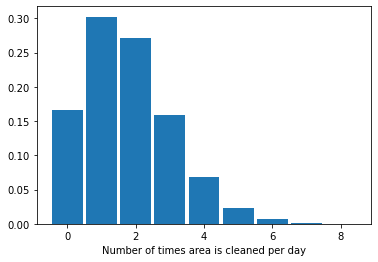

In [168]:
x = np.arange(0,9)
y = stats.binom(n, p).pmf(x)

plt.bar(x,y, width = 0.9)
plt.xlabel('Number of times area is cleaned per day')

## 5a. How likely is it that it goes two days without getting cleaned up? 

In [152]:
n = 118 #n*2
p = 0.03
clean_2 = stats.binom(n, p)

In [153]:
clean_2.pmf(0)

0.02748303199257622

## 5b. All week?

In [154]:
n = 295 #n*5
p = 0.03
clean_wk = stats.binom(n, p)

In [155]:
clean_wk.pmf(0)

0.00012521651388091353

# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
## After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is *normally distributed* with a mean of 15 and standard deviation of 3. 
- If it takes **2 minutes** for each person to order, and **10 minutes from ordering** to getting your food, what is the likelihood that you have **at least 15 minutes left** to eat your food before you have to go back to class? 
- Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [156]:
#convert mean/std to min
pan_lunch = stats.norm(30, 6)

In [159]:
#keep the 35 remaining min
pan_lunch.cdf(35)

0.7976716190363569

In [158]:
#using simulation
(np.random.normal(30, 6, 10_000) < 35).mean()

0.7885

In [169]:
panlunch = stats.norm(15, 3)

In [172]:
panlunch.cdf(17.5)

0.7976716190363569

# 7. Connect to the `employees` database and find the average salary of current employees, along with the standard deviation. 
## For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [98]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

## 7a. What percent of employees earn less than 60,000?

In [113]:
sal = """
SELECT *
FROM salaries
WHERE to_date > NOW()
"""

cur_sal = pd.read_sql(sal, url)
cur_sal.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [114]:
cur_sal.emp_no.count()

240124

In [119]:
meansal = round(cur_sal.salary.mean(), 2)
stdsal = round(cur_sal.salary.std(), 2)

17310.0

In [122]:
nd_salaries = stats.norm(meansal, stdsal)
nd_salaries.cdf(59_999.99)

0.24385722667952825

## 7b. What percent of employees earn more than 95,000?

In [123]:
nd_salaries.sf(95_000)

0.09208829007127312

## 7c. What percent of employees earn between 65,000 and 80,000?

In [124]:
nd_salaries.cdf(80_000) - nd_salaries.cdf(65_000)

0.33506048676360467

In [161]:
np.diff(stats.norm(meansal, stdsal).cdf([65000, 80000]))

array([0.33506049])

## 7d. What do the top 5% of employees make?

In [128]:
nd_salaries.isf(0.05).round(2)

100484.66

In [163]:
stats.norm(meansal, stdsal).isf(0.05)

100484.65628252999